In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd 


diabete = pd.read_csv("diabetes.csv") 

diabete.head()


diabete.dtypes


diabete['Outcome'] = diabete['Outcome'].astype(str)
diabete.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object

# J'ai choisi de convertir la variable Outcome en 'string' (chaîne de caractères) 
# mais on peut très bien garder Outcome comme une variable numérique. 
# Attention dans ce cas là à spécifier Oucome == 1 et non Outcome =='1' dans la suite.


In [3]:
# Quelques statistiques
# 2 façons d'accéder aux variables
print(diabete.Glucose.mean())
print(diabete['Glucose'].mean())


(diabete.Outcome == '1').mean()


120.89453125
120.89453125


0.3489583333333333

# Il y a donc environ $35\%$ de diabétiques dans la base de données. Cela nous donne une base pour évaluer la qualité de prédiction
# d'un classifieur. Un classifieur naïf consisterait à toujours classifier un individu en non diabétique, quelque soit ses covariables, ce qui correspondrait donc à un taux de mauvaise classification égal à $35\%$.


In [4]:
# Moyenne Glucose sur chaque classe

print(diabete.Glucose[diabete['Outcome'] == '1'].mean())
print(diabete.Glucose[diabete['Outcome'] == '0'].mean())


141.25746268656715
109.98


In [5]:
#2) Création base test et apprentissage
n = diabete.shape[0]

n

ind = np.random.rand(n) < 0.2
ind.mean()

dataApp = diabete[ind==False].copy()#diabete[np.logical_not(ind)].copy()# si on ajoute pas .copy() toute modification de ces
# données modifiera aussi le dataframe initial
dataTest = diabete[ind].copy()


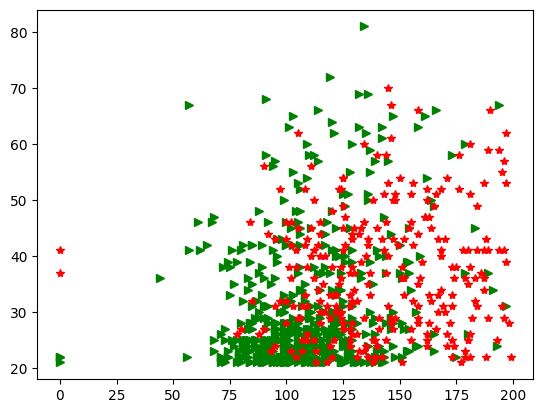

(623, 3)
(145, 3)


In [6]:
# 3)
ind_diab = diabete.Outcome == '1'
plt.figure()
plt.plot(diabete.Glucose[-ind_diab], diabete.Age[-ind_diab], 'g>')
plt.plot(diabete.Glucose[ind_diab], diabete.Age[ind_diab], 'r*')
plt.show()
#utiliser diabete.Outcome == '1' si Outcome est en string ou diabete.Outcome == 1 si Outcome est numérique


App1 = dataApp.filter(['Glucose', 'Age', 'Outcome'], axis = 1)
Test1 = dataTest.filter(['Glucose', 'Age', 'Outcome'], axis = 1)

App1.head()

print(App1.shape)
print(Test1.shape)


In [7]:
# 4)
# le package a installer s'appelle scikit-learn

import sklearn
sklearn.__version__
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(App1.drop('Outcome', axis = 1), App1.Outcome)


# On peut comparer les estimateurs des paramètres lda renvoyés par la fonction **lda** et ceux calculés 'à la main' à partir des formules du cours.

lda.means_ #Attribut

# Calcul des moyennes avec les formules du cours
[App1.Glucose[App1['Outcome'] == '1'].mean(), App1.Glucose[App1['Outcome'] == '0'].mean()]

[App1.Age[App1.Outcome == '1'].mean(), App1.Age[App1.Outcome == '0'].mean()]

lda.priors_ #Attribut

# Calcul de p avec la formule du cours
(App1.Outcome == '1').mean()


0.34831460674157305

# Calcul de l'erreur de prédiction calculée sur l'échantillon d'apprentssage ('in sample error') versus erreur de prédiction calculée sur l'échantillon test. C'est cette deuxième erreur qui est la plus pertinente pour évaluer la qualité de prédiction de l'algorithme sur les données.


In [8]:
# Errors
# Erreur sur l'ech. d'apprentissage
Predlin = lda.predict(App1.drop('Outcome', axis = 1))# in sample
(Predlin != App1.Outcome).mean()

# Erreur sur l'ech. de test
Predlin = lda.predict(Test1.drop('Outcome', axis = 1))# out of sample
(Predlin != Test1.Outcome).mean()


# Matrice confusion:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix( Test1.Outcome,Predlin), index =['ND', 'D'], columns = ['ND', 'D'])

(Test1.Outcome == '1').sum() #en ligne la verite, en colonne les predictions


51

In [9]:
# Version hétéroscédastique
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(App1.drop('Outcome', axis = 1), App1.Outcome)


qda.means_ #Attribut


[App1.Glucose[App1['Outcome'] == '1'].mean(), App1.Glucose[App1['Outcome'] == '0'].mean()]


qda.priors_ #Attribut


Predquad = qda.predict(App1.drop('Outcome', axis = 1))
(Predquad != App1.Outcome).mean()

Predquad = qda.predict(Test1.drop('Outcome', axis = 1))
(Predquad != Test1.Outcome).mean()

pd.DataFrame(confusion_matrix(Test1.Outcome,Predquad), index =['ND', 'D'], columns = ['ND', 'D'])


,ND,D
ND,79,15
D,23,28


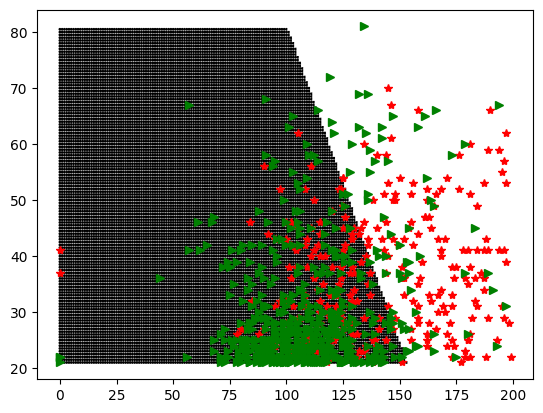

In [10]:
# 5) Tracé des frontières de décision
xgrid = np.arange(diabete.Glucose.min(), diabete.Glucose.max(), 1)
ygrid = np.arange(diabete.Age.min(), diabete.Age.max(), 0.5)


xG, yG = np.meshgrid(xgrid, ygrid) # create the actual grid
xG = xG.flatten() # make the grid 1d
yG = yG.flatten() # same
grid = pd.DataFrame({'Glucose':xG, 'Age':yG})

grid.shape

grid

# Cas linéaire 
Predlin = lda.predict(grid)

Predlin

ind_diab = diabete.Outcome == '1'

plt.figure()
plt.scatter(grid.Glucose, grid.Age,  s=1, c=Predlin)
plt.plot(diabete.Glucose[ind_diab], diabete.Age[ind_diab], 'r*')
plt.plot(diabete.Glucose[-ind_diab], diabete.Age[-ind_diab], 'g>')
plt.show()


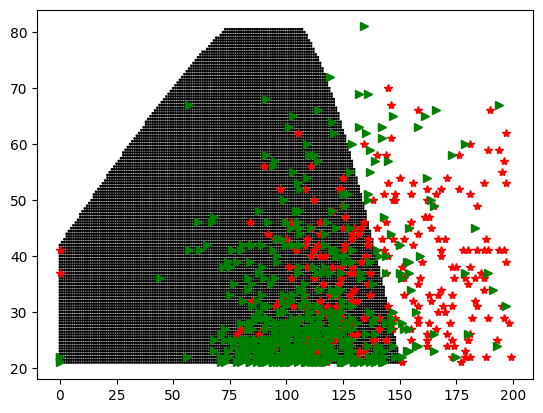

In [11]:
# Cas quadratique 


Predqda = qda.predict(grid)

ind_diab = diabete.Outcome == '1'

plt.figure()
plt.scatter(grid.Glucose, grid.Age,  s=1, c=Predqda)
plt.plot(diabete.Glucose[ind_diab], diabete.Age[ind_diab], 'r*')
plt.plot(diabete.Glucose[-ind_diab], diabete.Age[-ind_diab], 'g>')
plt.show()


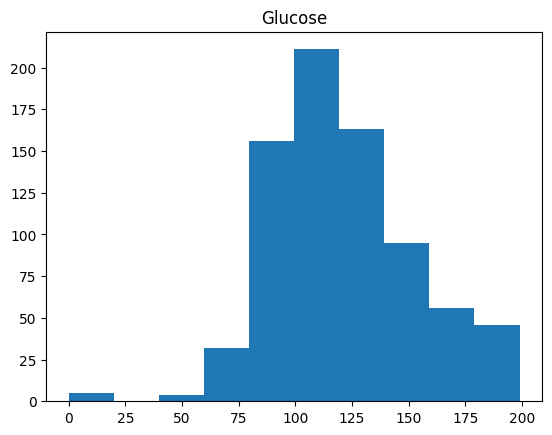

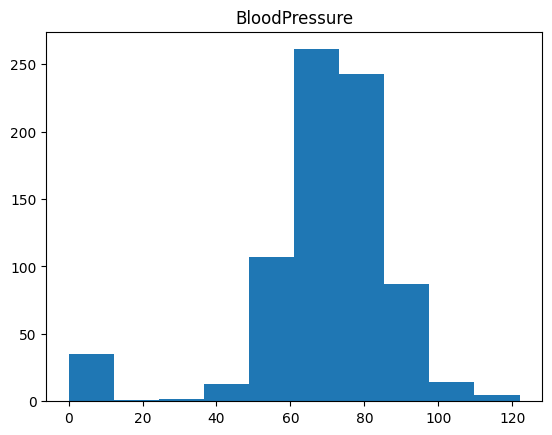

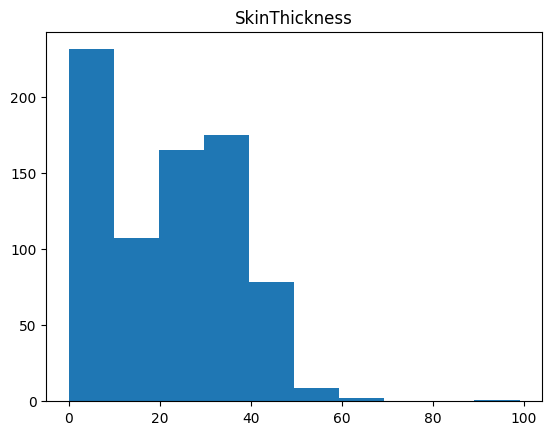

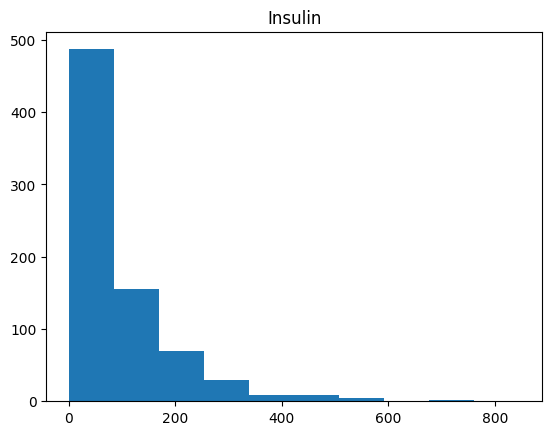

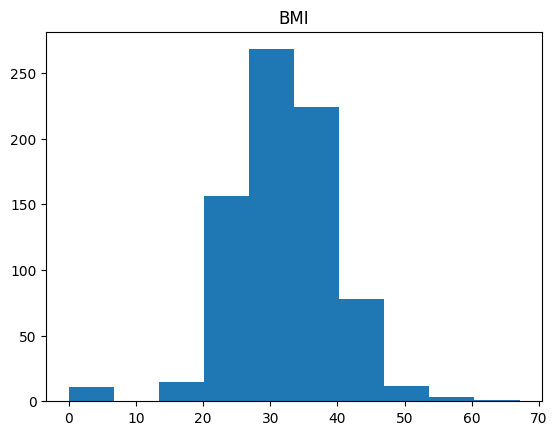

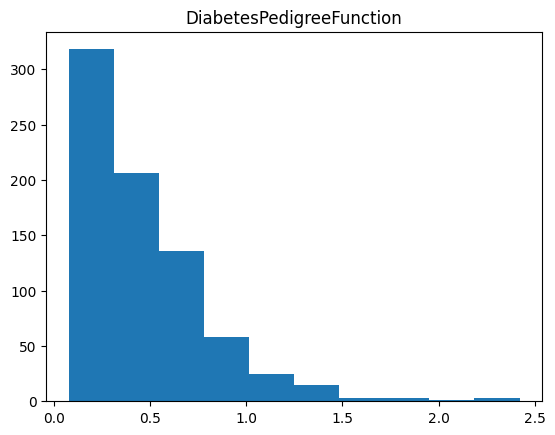

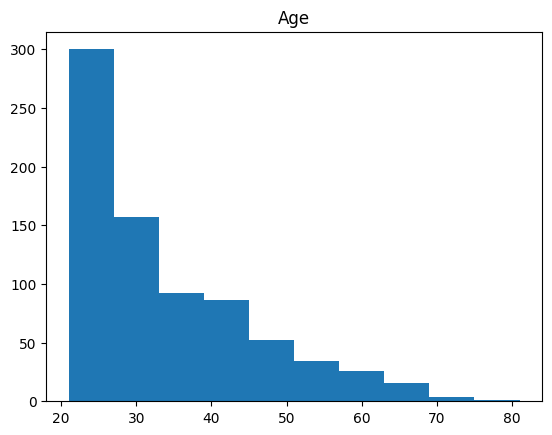

<Axes: >

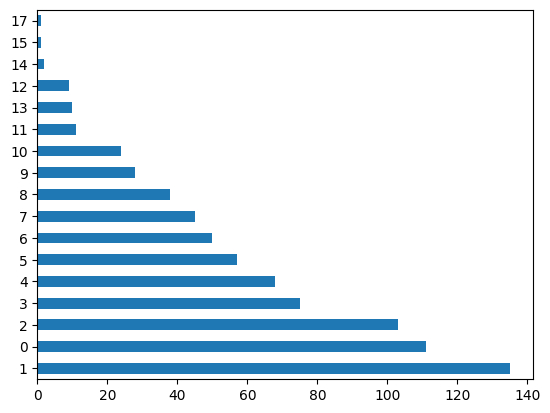

In [12]:
# Complément
## Etude descriptive des covariables
## Histogrammes
for x in diabete:
    if x == 'Outcome' or x == 'Pregnancies': continue
    plt.figure()
    plt.hist(diabete[x])
    plt.title(x)
plt.show()

diabete['Pregnancies'].value_counts()

diabete['Pregnancies'].value_counts().plot(kind='barh')


# Il y a des problèmes avec les variables Glucose, BloodPressure, SkinThickness, Insulin, BMi qui contiennent des 0 !! Ce sont en fait des données manquantes.

# ## lda avec toutes les variables de la base.


In [13]:
diabete.drop(['Outcome'], axis=1).mean(axis=0)

diabete_new = diabete.drop(['Outcome'], axis=1)


# On va remplacer toutes les données manquantes (les 0) par la moyenne de la variable.




diabete_new.replace(0,diabete_new.mean(axis=0),inplace=True)




diabete_new['Outcome'] = diabete['Outcome']
diabete_new


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


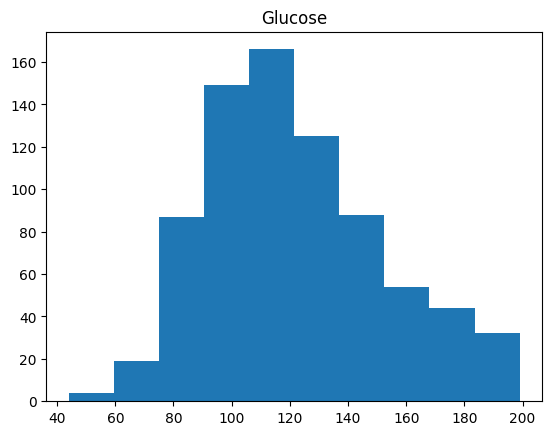

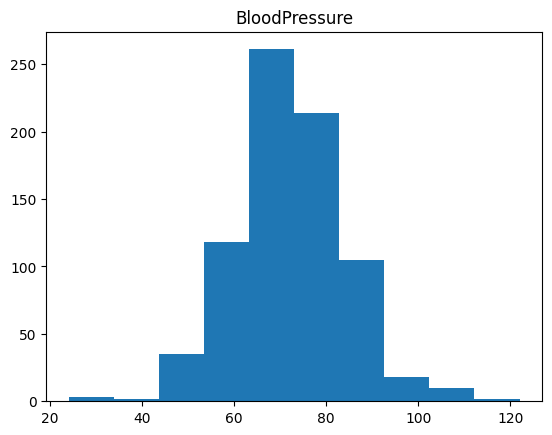

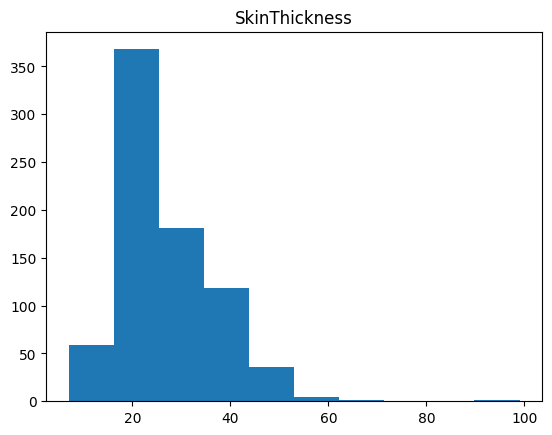

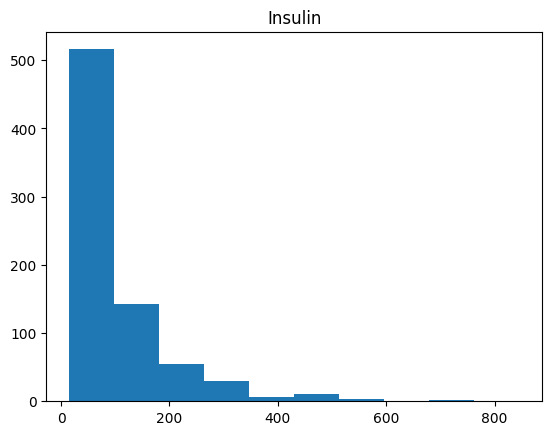

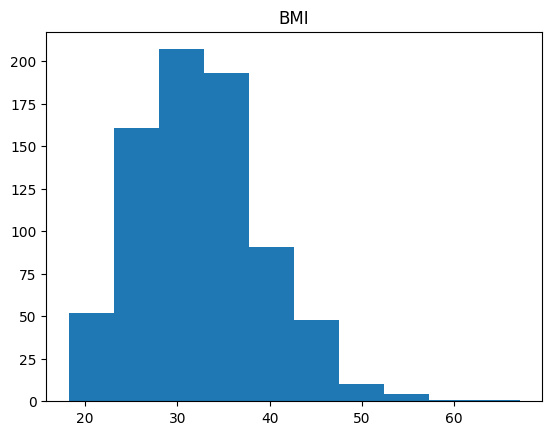

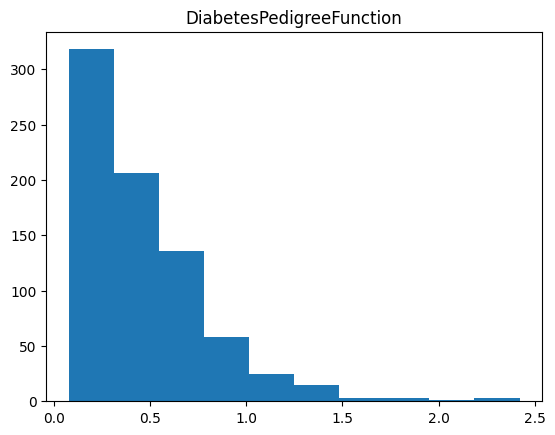

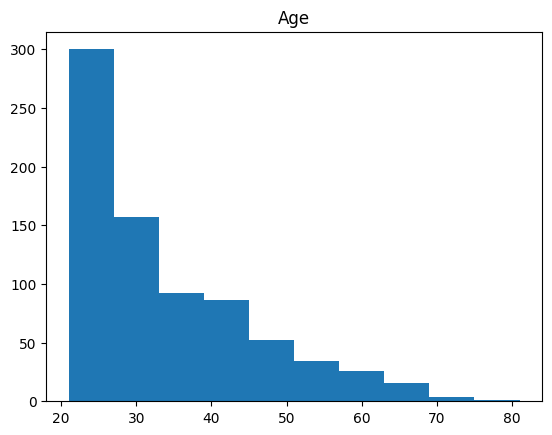

In [14]:
## Histogrammes (il n'y a plus de problèmes avec les 0)
for x in diabete_new:
    if x == 'Outcome' or x == 'Pregnancies': continue
    plt.figure()
    plt.hist(diabete_new[x])
    plt.title(x)
plt.show()


In [15]:
dataApp_new = diabete_new[ind==False].copy()
dataTest_new = diabete_new[ind].copy()




lda = LinearDiscriminantAnalysis()
lda.fit(dataApp_new.drop('Outcome', axis = 1), dataApp_new.Outcome)




lda.means_ #Attribut




Predlin = lda.predict(dataTest_new.drop('Outcome', axis = 1))# out of sample
(Predlin != dataTest_new.Outcome).mean()




pd.DataFrame(confusion_matrix( dataTest_new.Outcome,Predlin), index =['ND', 'D'], columns = ['ND', 'D'])


,ND,D
ND,79,15
D,19,32


In [16]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(dataApp_new.drop('Outcome', axis = 1), dataApp_new.Outcome)




qda.means_ #Attribut




Predquad = qda.predict(dataTest_new.drop('Outcome', axis = 1))# out of sample
(Predquad != dataTest_new.Outcome).mean()




pd.DataFrame(confusion_matrix( dataTest_new.Outcome,Predquad), index =['ND', 'D'], columns = ['ND', 'D'])


,ND,D
ND,81,13
D,18,33
